# Problem Statement

To predict the trip duration of NYC taxi rides using historical ride data.

# TAXI DURATION QUESTIONS

>What is the average duration of taxi duration in the NYC?

>Are there peak hour when trips are longer?

>How trip vary through the week?

>Are there diffferences between pickup and dropoff location?

>How the traffic affects the trip Duration?

>Does the weather affects the payment during the trip?

# Hypothesis Generation

> Trip duration is significantly influenced by the pickup time, distance between locations, weather, traffic, and number of passengers.

# Hypothesizations OR Findings

>The are longer trips During rush hours(7 to 10 AM and 5 to 7 PM).

>Trip duration are usually long during weekdays than the weekends.

>Trips that are payed with a card they usually have different duration than the one payed with cash.

>From Ellis Island usualy takes long when going to the Battery Park.

>Weekends have shorter durations due to lighter traffic.

>Rush hours result in longer durations.

>Longer distances naturally take more time.

>Bad weather and high traffic increase trip time.

>Weather (external) Rain/snow/temperature might delay trips.

ACCESSING THROUGH THE FILE

In [47]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings(action = 'ignore')

In [48]:
#Reading a CSV file of NYC trip Duration.
data = pd.read_csv('ASSINGMENT DATASET/nyc_taxi_trip_duration.csv')

In [49]:
#reading the first 5 instenses of the data.
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [50]:
#Reading the 5 instenses of the data.
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [51]:
#Reading the first and the last instenses of the data.
data.reset_index()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...,...
729317,729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [52]:
#Output (rows, columns).
data.shape

(729322, 11)

In [53]:
#Printing all the columns present in data.
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [54]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [55]:
# Identifying variables with float datatype.
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [56]:
# Identifying variables with integer datatype.
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [57]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
print(data['store_and_fwd_flag'].dtypes)

category


In [58]:
#checking data types after convection
data.dtypes

id                      object
vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
dtype: object

In [59]:
#Finding the misssing values though the data.
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# REFORMATING FEATURES AND CHECKING CONSISTENCY
# Converting string to DateTime Features

In [60]:
#Coverting string to datetime.
date = pd.DatetimeIndex(data['pickup_datetime'])

In [61]:
# extracting new columns from 'pickup_datetime'

# last day of year when last pickup
data['doy_pickup'] = date.dayofyear

# week of year when last pickup
data['hour_pickup'] = date.hour

# month of year when last pickup
data['moy_pickup'] = date.month

# day of week when last pickup
data['dow_pickup'] = date.dayofweek

In [62]:
data[['doy_pickup','hour_pickup','moy_pickup','dow_pickup']].head(6)

,doy_pickup,hour_pickup,moy_pickup,dow_pickup
0,60,16,2,0
1,71,23,3,4
2,52,17,2,6
3,5,9,1,1
4,48,6,2,2
5,45,18,2,6


In [63]:
#Coverting string to datetime.
date = pd.DatetimeIndex(data['dropoff_datetime'])

In [64]:
# extracting new columns from 'dropoff_datetime'

# last day of year when last dropoff
data['doy_dropoff'] = date.dayofyear

# week of year when last dropoff
data['hour_dropoff'] = date.hour

# month of year when last dropoff
data['moy_dropoff'] = date.month

# day of week when last dropoff
data['dow_dropoff'] = date.dayofweek

In [65]:
data[['doy_dropoff','hour_dropoff','moy_dropoff','dow_dropoff']].head(6)

,doy_dropoff,hour_dropoff,moy_dropoff,dow_dropoff
0,60,16,2,0
1,71,23,3,4
2,52,18,2,6
3,5,10,1,1
4,48,6,2,2
5,45,18,2,6


In [66]:
#Converting yes/no to 1 and 0.
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({ 'Y':1, 'N':0})
data['store_and_fwd_flag'].head()

0    0
1    0
2    0
3    0
4    0
Name: store_and_fwd_flag, dtype: category
Categories (2, int64): [0, 1]

In [67]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_pickup,hour_pickup,moy_pickup,dow_pickup,doy_dropoff,hour_dropoff,moy_dropoff,dow_dropoff
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,91.882577,13.611698,3.518410,3.049081,91.893805,13.60616,3.518764,3.053015
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,51.555655,6.402853,1.680661,1.954470,51.556407,6.48637,1.680815,1.956866
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,48.000000,9.000000,2.000000,1.000000,48.000000,9.00000,2.000000,1.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,92.000000,14.000000,4.000000,3.000000,92.000000,14.00000,4.000000,3.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,136.000000,19.000000,5.000000,5.000000,136.000000,19.00000,5.000000,5.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,182.000000,23.000000,6.000000,6.000000,183.000000,23.00000,7.000000,6.000000


In [68]:
#Log trip_duration transformation and plotting the result as pdf. 
data['log_trip_duration'] = np.log1p(data['trip_duration'])

<Axes: xlabel='log_trip_duration', ylabel='Count'>

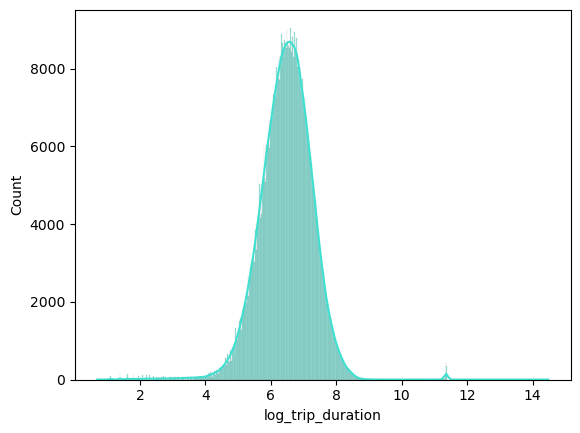

In [69]:
sns.histplot(data['log_trip_duration'], kde =True, color='turquoise' )

The graph shows log-normally distributed and indicate some very long trips.

The peak of the distribution is around 7 on the log scale and the distribution is relatively symetric and concentrated around the mean.

# UNIVARIATE VISUALISATION

In [70]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
log_trip_duration    float64
dtype: object

In [71]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'doy_pickup', 'hour_pickup', 'moy_pickup',
       'dow_pickup', 'doy_dropoff', 'hour_dropoff', 'moy_dropoff',
       'dow_dropoff', 'log_trip_duration'],
      dtype='object')

In [72]:
# seggregating variables into groups
customer_details = ['vendor_id']
time_detais = ['pickup_datetime', 'dropoff_datetime']
count = ['passenger_count']
pickup_an_dropoff = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
dropoff_datetime = ['doy_dropoff','hour_dropoff','moy_dropoff','dow_dropoff']
pickup_datetime = ['doy_pickup','hour_pickup','moy_pickup','dow_pickup']
duration = ['trip_duration']
map_flag = ['store_and_fwd_flag']

In [73]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
      
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

PASSENGER COUNT

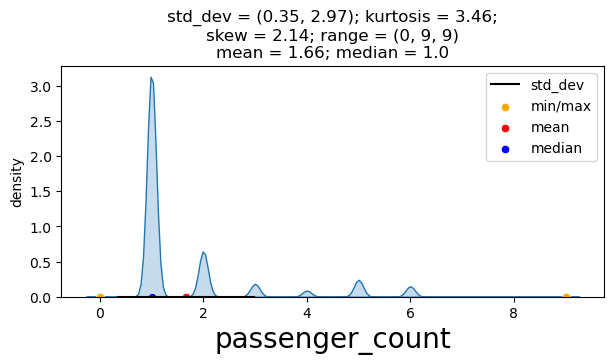

In [74]:
 UVA_numeric(data, count)

The graph is positively skewed and we can find out that between 0 and 2 there is high density.

We can see that the graph is droppping rappidly and number of passengers growing resulting on change trip duration.

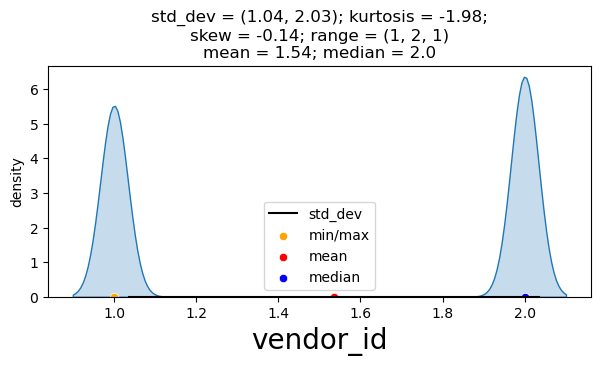

In [75]:
 UVA_numeric(data, customer_details)

Vendor_ID

Can be eliminated from data.

Does not contribute any information.

This can be a longer distribution (Leptokurtic).

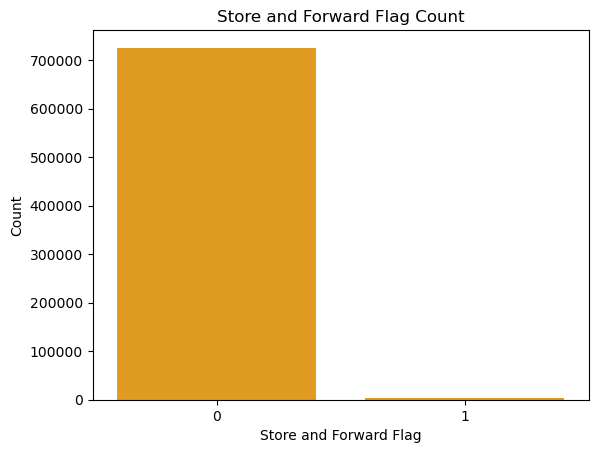

In [76]:
#Plotting graph for store_and_fwd_flag
sns.countplot(x='store_and_fwd_flag', data=data, color='orange')

plt.title('Store and Forward Flag Count')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Count')
plt.show()

The graph has a very heavy tail, indicate the presence of extreme outliers.

The range indicates that theres span from 0 to 1, with a maximum value of 0 occuring twice.

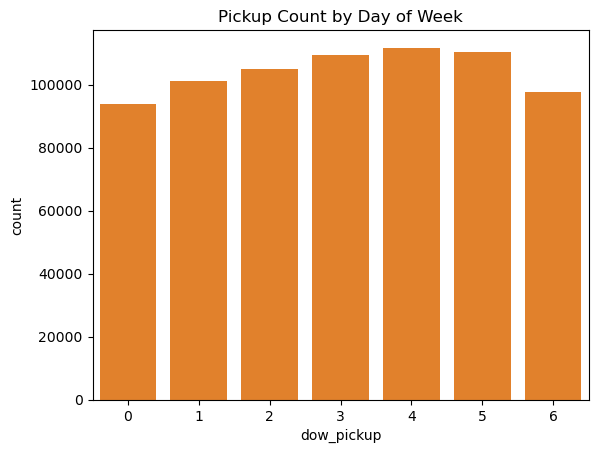

In [77]:
# Plot count of pickups by day of the week
custom_colors = ['#FFDD57', '#F4A261']

sns.countplot(x='dow_pickup', data=data, palette = custom_colors)
sns.countplot(x='dow_pickup', data=data)
plt.title('Pickup Count by Day of Week')
plt.show()

SUMMERY

During pickup day of the week ,we can see that the is rise in the graph telling that most people start traveling during the first day of week to the 
5th day of week.

According to my knowledge i can take 0 and 6 (suterday and sunday ) where we can tell that most people are not working during weekends.

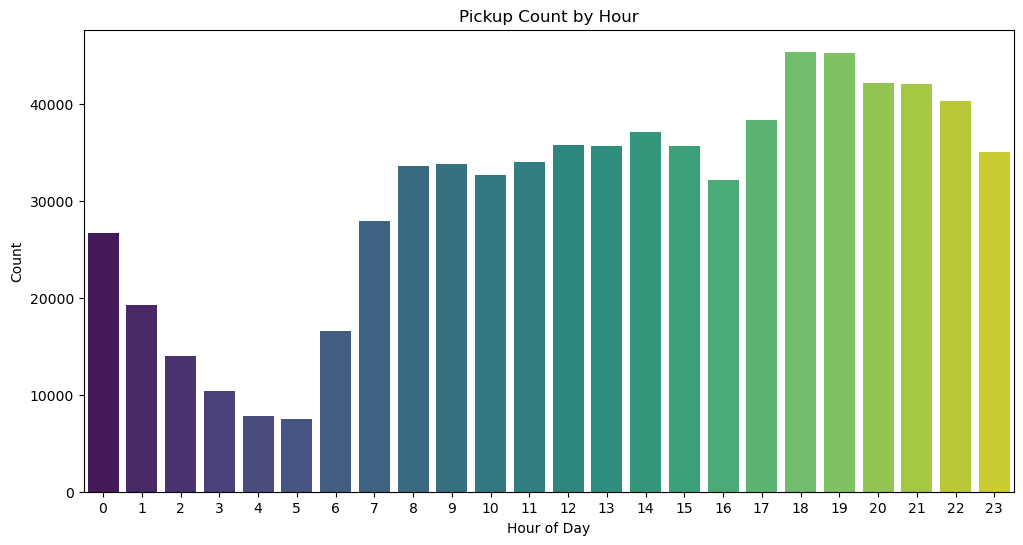

In [78]:
# Plot count of pickups by hour

plt.figure(figsize=(12, 6))  # Optional: adjust plot size

sns.countplot(x='hour_pickup', data=data, palette='viridis')

plt.title('Pickup Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

DURRING HOUR PICKUP

From 0 to 5 its in the AM we can find ther are few peaple traveveling.

And from 6 which is 6AM its starting to grow rappidly to tell us its during the day where people start travelling others are going to work or traveling going to places.

The lowest pickup occur between 4:00 and 5:00 with the values below 10000.

The majority of pickups take place during the late afternoon and early evening with a significantsurge around 7:00.

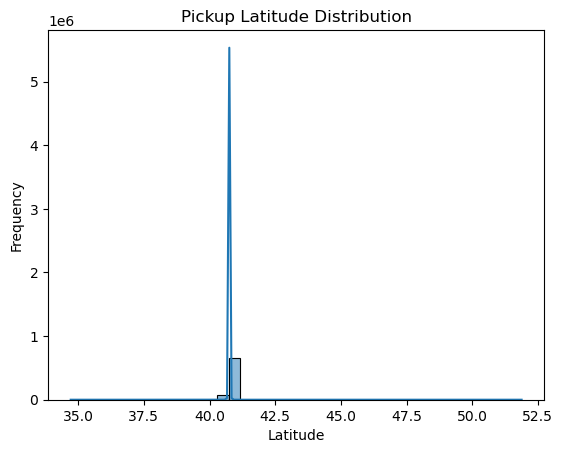

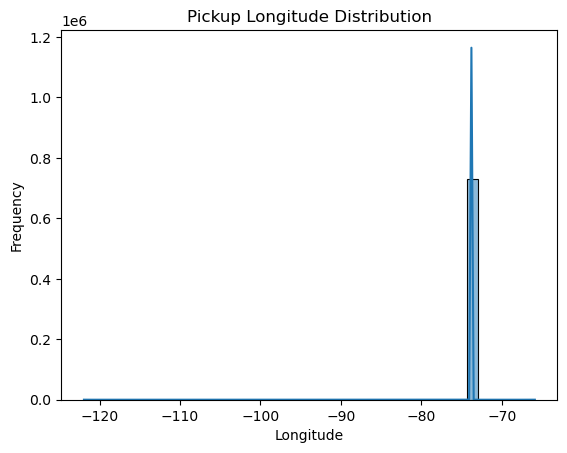

In [79]:
# Pickup Latitude & Longitude
sns.histplot(data['pickup_latitude'], bins=40, kde=True)
plt.title('Pickup Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['pickup_longitude'], bins=40, kde=True)
plt.title('Pickup Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

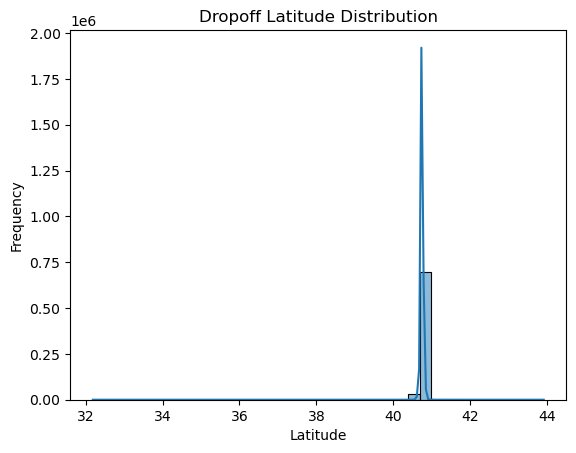

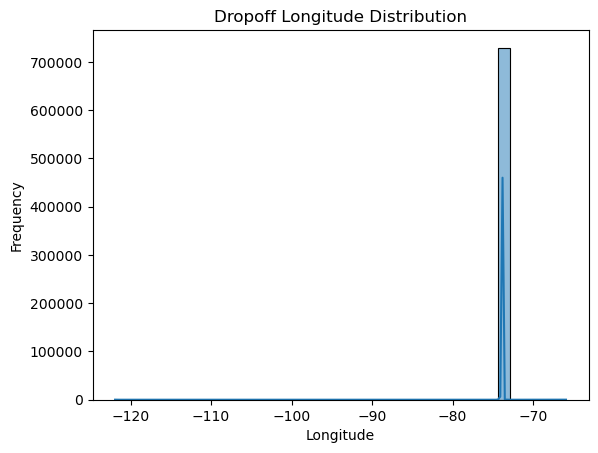

In [80]:
# Dropoff Latitude & Longitude
sns.histplot(data['dropoff_latitude'], bins=40, kde=True)
plt.title('Dropoff Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['dropoff_longitude'], bins=40, kde=True)
plt.title('Dropoff Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()


# Bivariate Analysis : Numerical-Numerical

In [81]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
log_trip_duration    float64
dtype: object

In [82]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752,0.019439
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.020749
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.112302
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.142551
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.072944
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.124989
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.327624
log_trip_duration,0.019439,0.020749,0.112302,-0.142551,0.072944,-0.124989,0.327624,1.000000


In [83]:
# Add day of week and hour of week
data['day_of_week'] = date.day_name()
data['hour_of_day'] = date.hour
data['hour_of_week'] = date.dayofweek * 24 + data['hour_of_day']

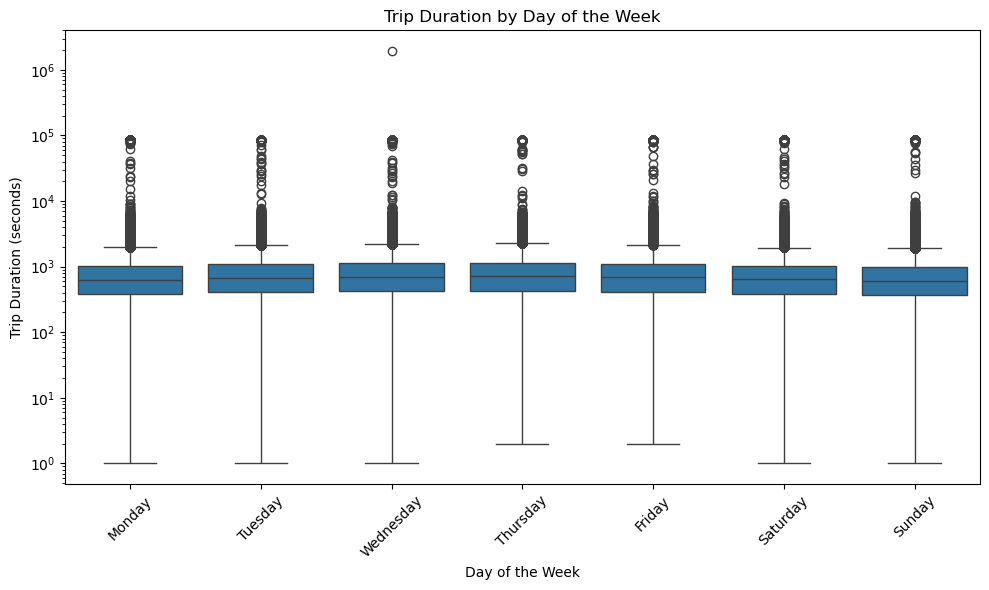

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='trip_duration', data=data, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.yscale('log')  # Optional: if durations have large range
plt.title('Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SUMMERY

Outliers are present all day with higher fequency during Monday and friday compared to weekends.

IQR is relatively consistent across all days, indicating similar variability in trip duration.

There's a slightly increase in meadian during Monday and Saturday.

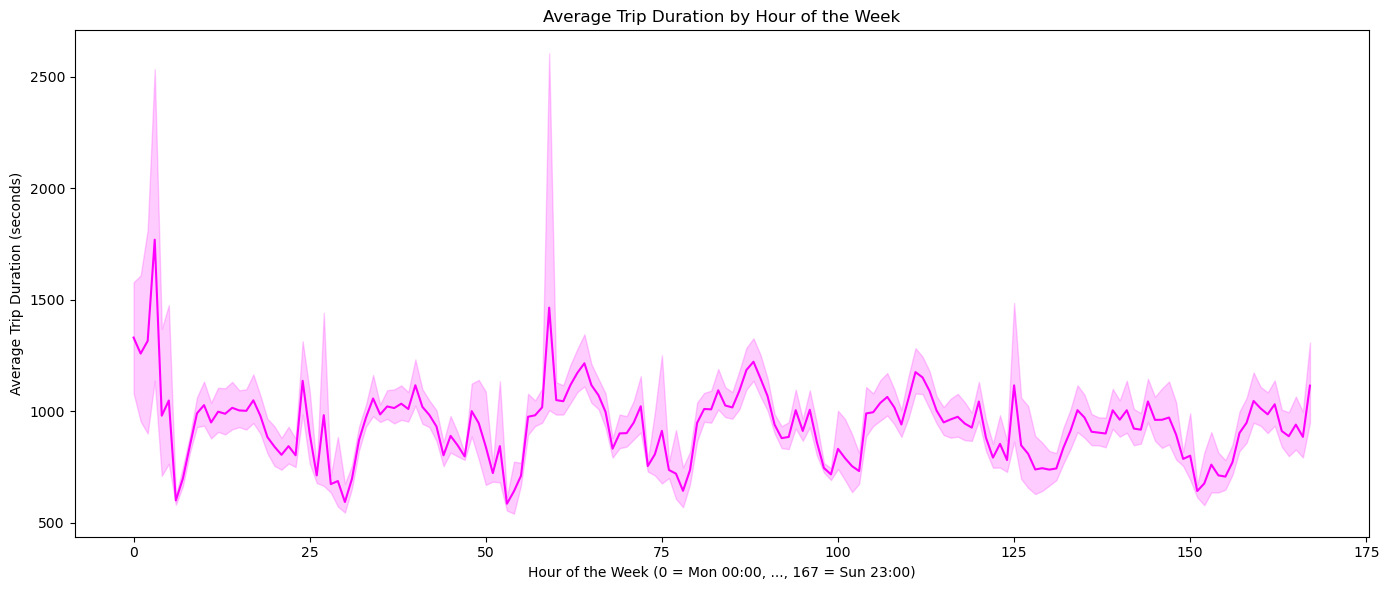

In [85]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='hour_of_week', y='trip_duration', data=data, estimator='mean', color='Magenta')
plt.title('Average Trip Duration by Hour of the Week')
plt.xlabel('Hour of the Week (0 = Mon 00:00, ..., 167 = Sun 23:00)')
plt.ylabel('Average Trip Duration (seconds)')
plt.tight_layout()
plt.show()


SUMMERY

Smaller peak is observed around hour 50 ,which responds to wednesday at 2:00 AM.

The trip duration remains stable throughout the week,with same fluctuations.

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

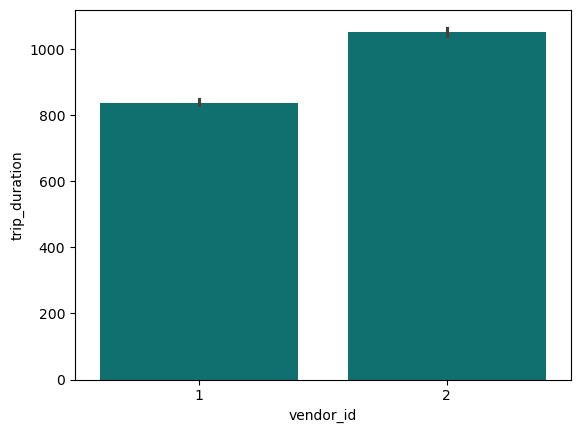

In [86]:
sns.barplot(x='vendor_id', y='trip_duration', data=data, color='Teal')

SUMMERY

The graph represent vendors id 1 and 2 with different hieght.

This tells us that the median in the both bars is likely different as we can see that second vendor_id has higher median.

Second vendor_id ,we can teel that they are the most who are travelling long distances.

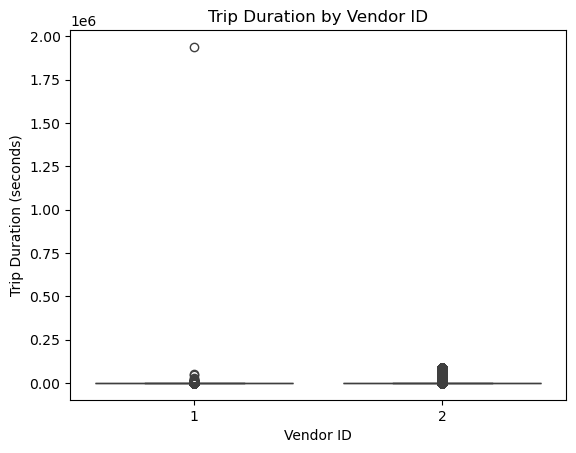

In [87]:
# Boxplot showing trip duration by vendor ID with outliers shown
sns.boxplot(x='vendor_id', y='trip_duration', data=data)

plt.title('Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (seconds)')
plt.show()

SUMMERY

The number of the outlier is quit different in the graph which tells us that we can find large numnber of outliers through trip duration.

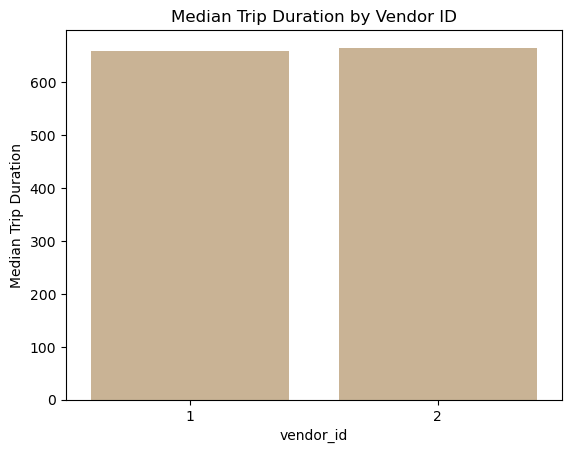

In [88]:
#XII. Median Trip Duration – Vendor Wise

median_trip = data.groupby('vendor_id')['trip_duration'].median().reset_index()

sns.barplot(x='vendor_id', y='trip_duration', data=median_trip, color='Tan')
plt.title('Median Trip Duration by Vendor ID')
plt.ylabel('Median Trip Duration')
plt.show()

SUMMERY

The two bars represent Vendor_id 1 and 2.

Both have the same hieght, indicating that the median in both is the same closely to 700.

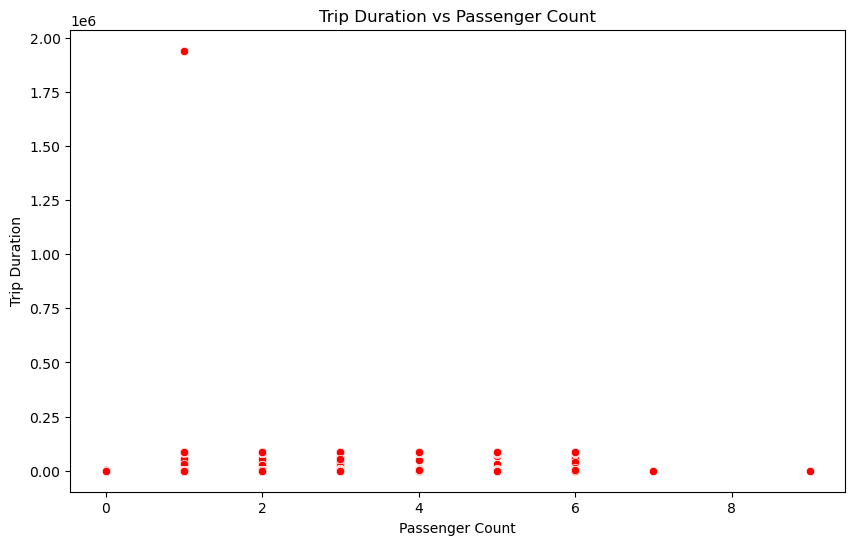

In [89]:
# Task 1: Determine and plot Trip Duration vs Passenger Count
plt.figure(figsize=(10,6))
sns.scatterplot(x='passenger_count', y='trip_duration', data=data, color='red')
plt.title('Trip Duration vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.show()

In [90]:
# Random sample of 1000 rows from my dataset
# Latitude for each point         
# Longitude for each point
# Sample 1000 random rows
sampled_data = data.sample(1000)

# Creating scatter map with color based on passenger count
fig = px.scatter_mapbox(sampled_data,
                        lat="pickup_latitude",
                        lon="pickup_longitude",
                        color="passenger_count",
                        size_max=10,
                        zoom=11,
                        hover_data=["passenger_count"],
                        title="NYC Pickup Locations by Passenger Count",
                        mapbox_style="open-street-map")  

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

>The majority of pickup points are densely clustered in Manhattan, particularly around:
Midtown (34th–59th Street)


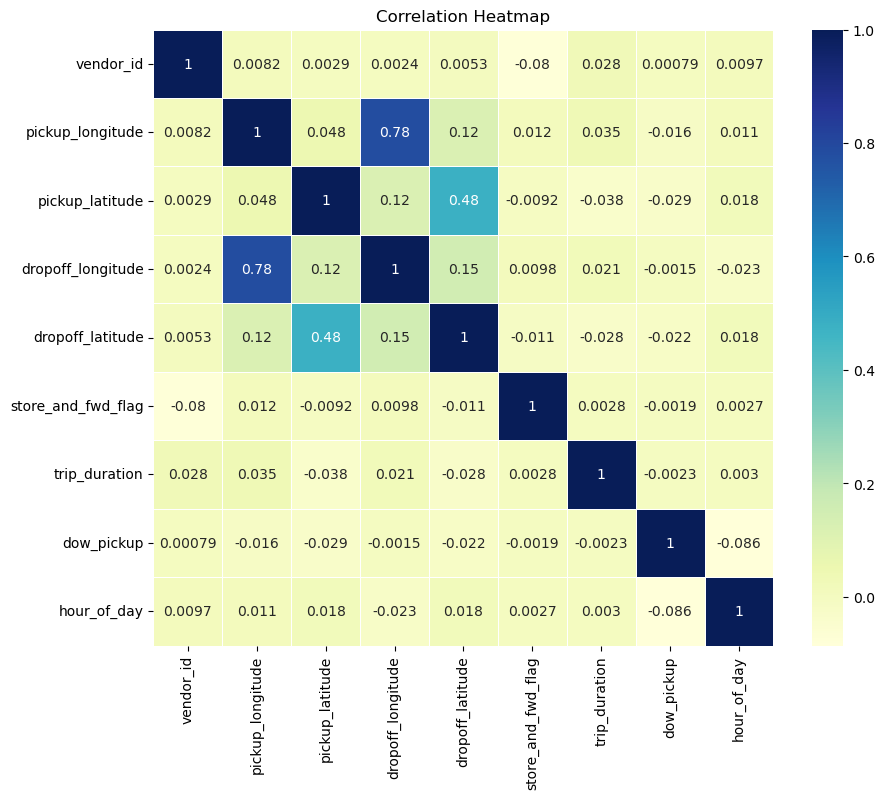

In [46]:
cols = ['vendor_id','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','store_and_fwd_flag','trip_duration', 'dow_pickup','hour_of_day']

# Compute correlation matrix
corr_matrix = data[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', square=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

SUMMERY

In the heatmap we find positive and negative Correlation

Positive correlations (close to +1): vehicle_count vs AQI implies higher traffic worsens air quality.

Negative correlations: avg_speed_kmph vs accidents might suggest accidents happen more in slow-moving traffic.

Weak correlations (close to 0): Variables may not directly influence each other, or other external factors may dominate.
